In [2]:
import numpy as np

# Identity gate (I)
I = np.array([
    [1, 0],
    [0, 1]
])
# Pauli-X gate (X)
X = np.array([
    [0, 1],
    [1, 0]
])
# Hadamard gate (H)
H = (1 / np.sqrt(2)) * np.array([
    [1,  1],
    [1, -1]
])
# CNOT gate matrix
CX = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 1, 0]
]).reshape(2,2,2,2)

In [ ]:
def apply_on_n_qubits_tensor(n):
    state_tensor = np.zeros((2,)*n)
    state_tensor[(0,)*n] = 1 # initial state = 000...
    # applying X gate on all qubits
    for i in range(n):
        # applying X gate on qubit i
        state_tensor = np.tensordot(X, state_tensor, axes=(1,i))
        state_tensor = np.moveaxis(state_tensor, 0, i)
        # applying H gate on qubit i
        state_tensor = np.tensordot(H, state_tensor, axes=(1,i))
        state_tensor = np.moveaxis(state_tensor, 0, i)
    # applying CX gate between each consecutive pair of qubits (qubits 0-1, 2-3, 3-4 and so on)
    for i in range(n-1):
        if(i%2):
            axes = ([2,3], [i, i + 1]) 
            state_tensor = np.tensordot(CX, state_tensor, axes=axes)
            # moving the resulting axes to maintain the original qubit ordering
            state_tensor = np.moveaxis(state_tensor, [0, 1], [i, i + 1])
    return state_tensor

In [13]:
import time
time_taken = []
state_tensor_n = []
N = 30
for n in range(2, N):
    start = time.time()
    state_tensor_n.append(apply_on_n_qubits_tensor(n).flatten())
    time_taken.append(time.time() - start)

# time_taken = np.array(time_taken)
n_values = [i for i in range(2,N)]
print(time_taken)

[0.0010030269622802734, 0.0, 0.0009961128234863281, 0.0, 0.0009989738464355469, 0.0010008811950683594, 0.0, 0.002239227294921875, 0.0011069774627685547, 0.0020093917846679688, 0.0011975765228271484, 0.0030460357666015625, 0.0029616355895996094, 0.005002737045288086, 0.010012149810791016, 0.046304941177368164, 0.08253931999206543, 0.17574191093444824, 0.3684248924255371, 0.747596025466919, 1.564124584197998, 3.25070858001709, 6.568576812744141, 12.480493545532227, 26.573132276535034, 59.6760139465332, 120.84210181236267, 263.8944683074951]


In [11]:
# state_tensor_n

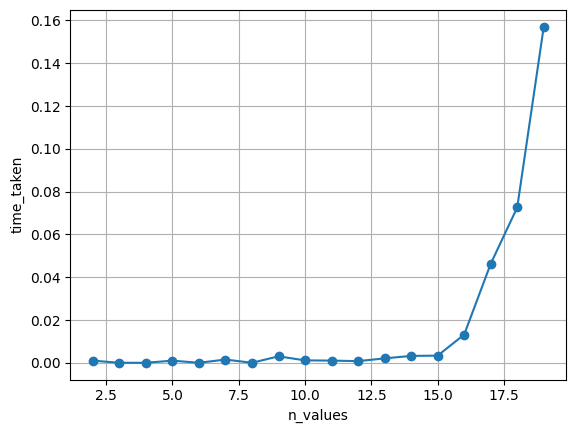

In [12]:
import matplotlib.pyplot as plt
plt.plot(n_values, time_taken, marker='o')
plt.xlabel("n_values")
plt.ylabel("time_taken")
plt.grid(True)
plt.show()